TO DO: Turn test data into pose data and save with label

In [1]:
!python --version

Python 3.8.18


In [2]:
!pip install --user opencv-python
!pip install --user mediapipe

  Using cached mediapipe-0.10.11-cp38-cp38-win_amd64.whl.metadata (9.8 kB)
Using cached mediapipe-0.10.11-cp38-cp38-win_amd64.whl (50.8 MB)


In [3]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import os

In [44]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic     #There are many different models you can use, like just face, hand or pose detections!

In [8]:
gloss_path = 'Data/CorpusNGT/gloss_split'

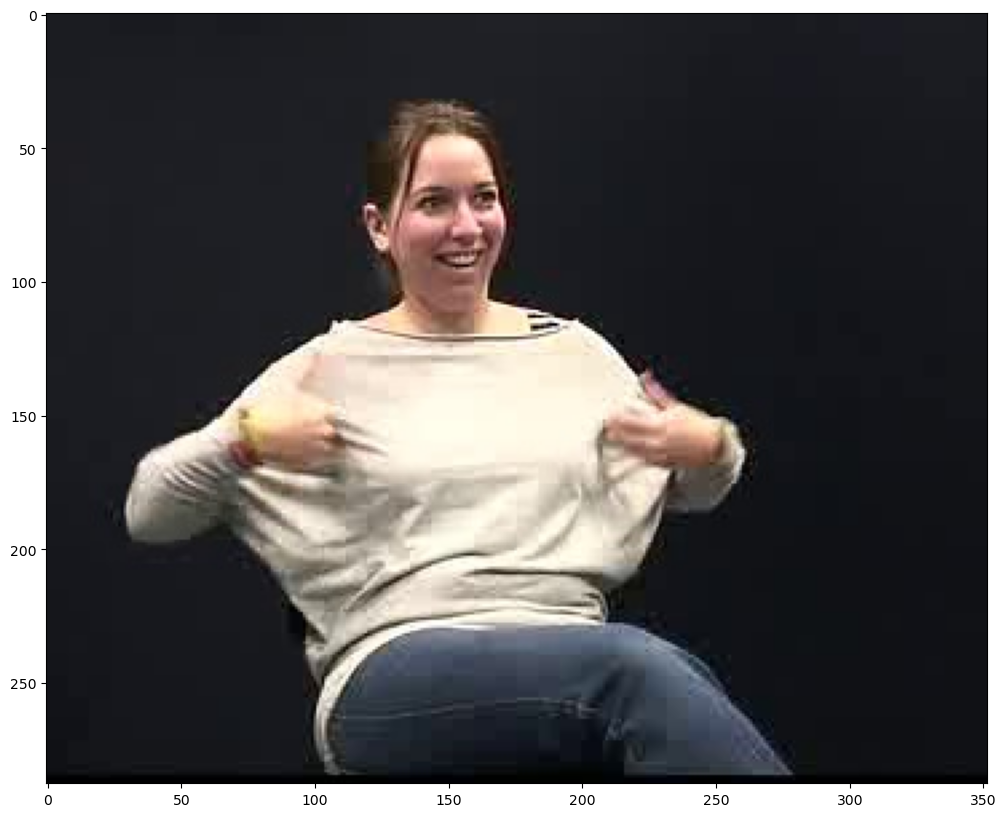

In [12]:
## Test on one frame

img = cv2.imread(gloss_path + "/AAP/1/frame4.jpg")
plt.figure(figsize=(15,10))
plt.imshow(img[...,::-1]);

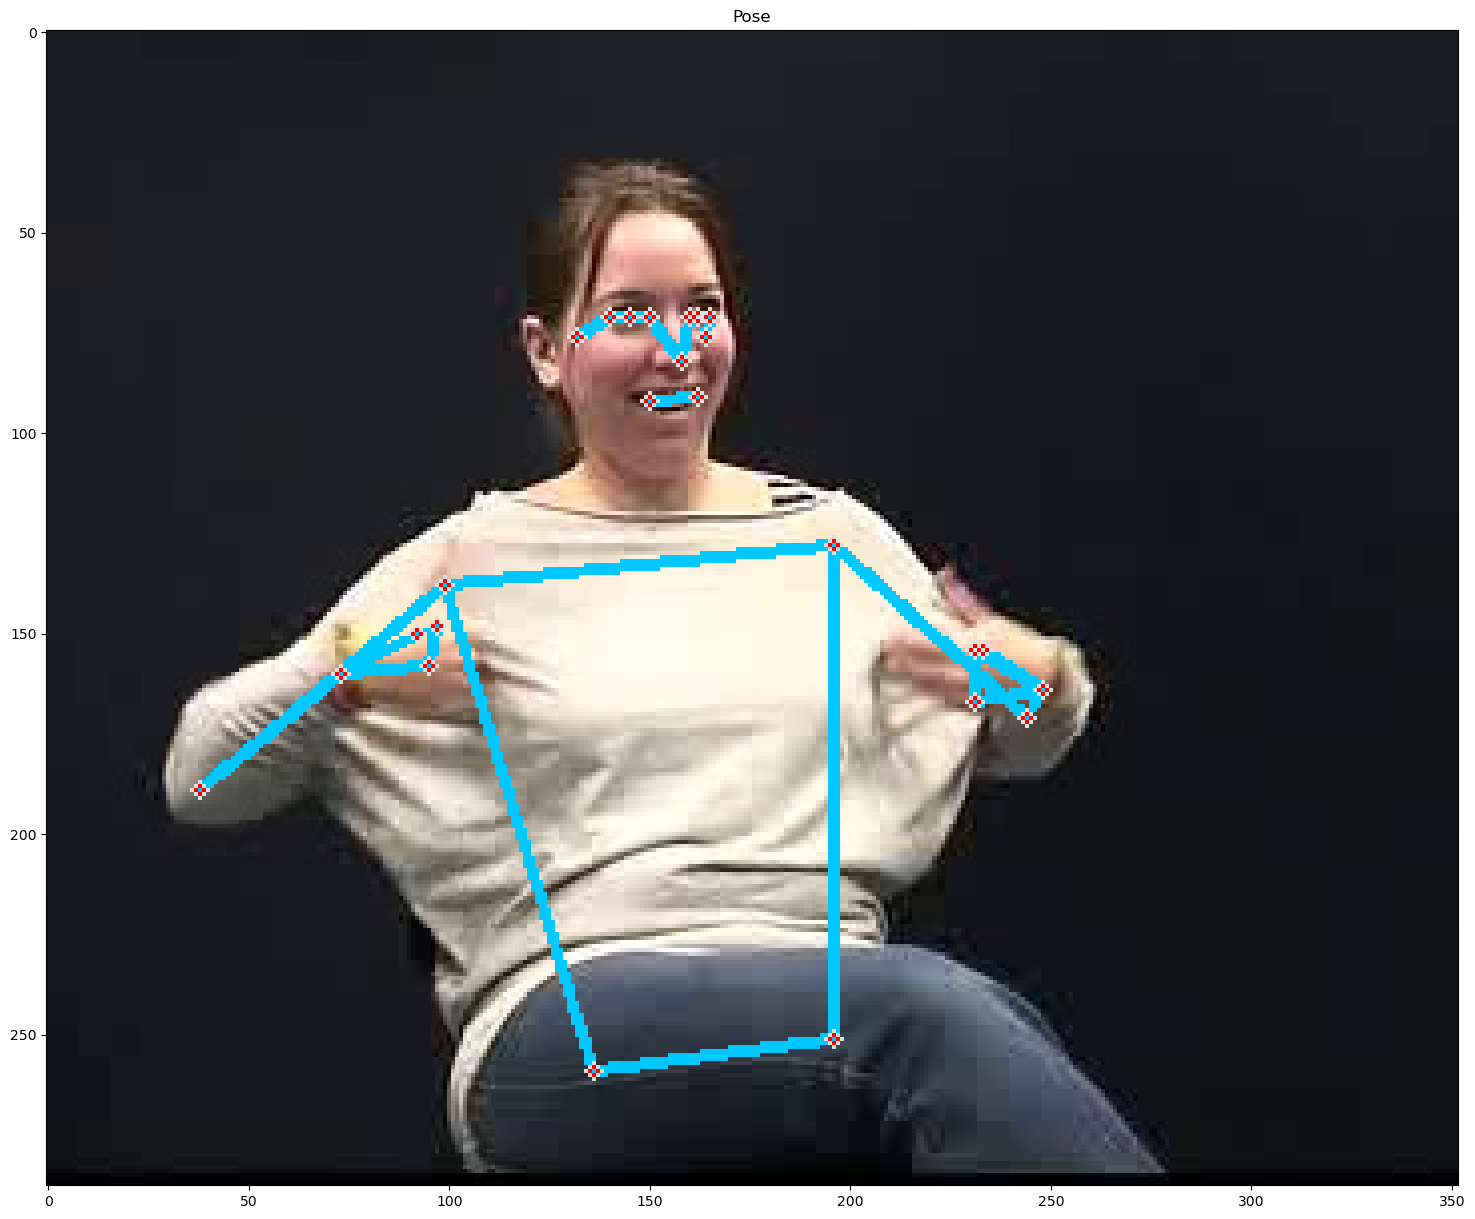

In [18]:
# Initialize MP pose.
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True,
                    model_complexity=2,
                    enable_segmentation=True,
                    min_detection_confidence=0.5)

# Convert to RGB.
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process.
results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

annotated_img = img.copy()

# Draw pose landmarks on the image.
mp_drawing.draw_landmarks(annotated_img,
                          results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS,
                          # Keep default style or write your own.
                          # landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
                          landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                          connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 200, 0), thickness=2, circle_radius=2))

# Display.
plt.figure(figsize=(20,15))
plt.imshow(annotated_img[...,::-1])
plt.title('Pose');
#print(results.pose_landmarks)

In [19]:
labels = np.load('Data/CorpusNGT/gloss_labels.npy', allow_pickle='TRUE').item()
gloss_count = np.load('Data/CorpusNGT/gloss_counts.npy', allow_pickle='TRUE').item()
print(labels)
print(gloss_count)

{'GLOSS': 0, 'LANG': 1, 'PO': 2, 'ZONDAG': 3, 'FIETSEN': 4, 'LOPEN': 5, 'WATER': 6, 'SPRINGEN': 7, 'STAAN': 8, 'BEEN': 9, 'GEK': 10, 'HOND': 11, 'DUWEN': 12, 'MOVE': 13, 'MEE': 14, 'GOOIEN': 15, 'KLAAR': 16, 'KLEREN': 17, 'VOCHTIG': 18, 'LACHEN': 19, 'UITKLEDEN': 20, 'VAN': 21, 'BROEK': 22, 'AANKLEDEN': 23, 'AL': 24, 'WACHTEN': 25, 'DROOG': 26, 'WEG': 27, 'BROOD': 28, 'JAM': 29, 'ONDERWIJS': 30, 'INTERNAAT': 31, 'ONGESTELD': 32, 'VERSCHILLENDE': 33, 'DUS': 34, 'ZENUWACHTIG': 35, 'OPGELUCHT': 36, 'BETER': 37, 'VERSLAAN': 38, 'GOED': 39, 'PANTOFFELS': 40, 'BE': 41, 'UUR': 42, 'BINNEN': 43, 'MOETEN': 44, 'LAATSTE': 45, 'PT': 46, 'MOOI': 47, 'HANDEN-WRIJVEN': 48, 'SCHRIKKEN': 49, 'SCHREEUWEN': 50, 'VLUCHTEN': 51, 'KAPOT': 52, 'HOUDEN-VAN': 53, 'SCHOOL': 54, 'ZATERDAG': 55, 'KAART': 56, 'BEZOEK': 57, 'TREIN': 58, 'BRIEF': 59, 'KUNNEN': 60, 'WAAR': 61, 'OPEN': 62, 'GEZELLIG': 63, 'PRATEN': 64, 'VERHAAL': 65, 'PRECIES': 66, 'KERK': 67, 'WIJ': 68, 'GAAN': 69, 'S': 70, 'MOEDER': 71, 'RUIMTE': 7

0 - nose
1 - left eye (inner)
2 - left eye
3 - left eye (outer)
4 - right eye (inner)
5 - right eye
6 - right eye (outer)
7 - left ear
8 - right ear
9 - mouth (left)
10 - mouth (right)
11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist
17 - left pinky
18 - right pinky
19 - left index
20 - right index
21 - left thumb
22 - right thumb
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index

In [39]:
# Initialize face detection solution and drawing utility.
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

LANDMARKER

In [54]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [91]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np

model_path = 'pose_landmarker.task'

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_file = open(model_path, "rb")
model_data = model_file.read()
model_file.close()

# STEP 2: Create an PoseLandmarker object.
options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_buffer=model_data),
    running_mode=VisionRunningMode.IMAGE)
#detector = vision.PoseLandmarker.create_from_options(options)

landmarker = PoseLandmarker.create_from_options(options)

In [106]:
#Perform pose estimation on all frames and save to dataframe

for catg in os.listdir(gloss_path):
    f1 = '{}/{}'.format(gloss_path, catg)
    for number in os.listdir(f1):
        f2 = '{}/{}'.format(f1, number)
        if os.path.isdir(f2):
            for frame in os.listdir(f2):
                f3 = '{}/{}'.format(f2, frame)
                split = f3.split(".")
                if split[1] == "jpg":
                    # Read image
                    img = cv2.imread(f3)
                    mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
                    
                    # Process.
                    pose_landmarker_result = landmarker.detect(mp_img)

                    # Save landmarks as nparray
                    for landmarks in pose_landmarker_result.pose_landmarks:
                        
                        arr = np.zeros((33,3))
                        y = 0
                        for normalizedlandmark in landmarks:
                            arr[y] = [normalizedlandmark.x, normalizedlandmark.y, normalizedlandmark.z]
                            y+=1

                        np.save('{}_{}'.format(split[0], 'array'), arr, allow_pickle=True, fix_imports=True)
                    

KeyboardInterrupt: 